# Testing the square root scheduler

I'm not 100% certain my implementation is correct, so in this notebook I'll take a closer look at the square root scheduler I wrote.

In [1]:
import torch
import numpy as np

from einops import repeat
import matplotlib.pyplot as plt

from datasets import load_dataset

from diffusion_lm.model import DiffusionLM
from diffusion_lm.utils import diffusion_noise_schedule

In [2]:
e2e_dataset = load_dataset("e2e_nlg")

Found cached dataset e2e_nlg (/home/kakapo/.cache/huggingface/datasets/e2e_nlg/default/0.0.0/bfeceb720929c2705bd227d1cfe5eaaab102a0bdac10dad618dac1e00c737430)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
text = e2e_dataset['train'][0]['human_reference']
text

'The Vaults pub near Café Adriatic has a 5 star rating.  Prices start at £30.'

In [4]:
model = DiffusionLM(d=2048)

In [5]:
embedding = model.get_embedding(text)

In [6]:
embedding.shape

torch.Size([1, 20, 2048])

In [7]:
T = 2000

In [8]:
x = torch.rand(embedding.shape)

In [9]:
x[0,0,:]

tensor([0.3349, 0.1731, 0.5007,  ..., 0.7677, 0.1375, 0.6740])

(array([67., 66., 61., 71., 65., 62., 73., 65., 63., 66., 60., 76., 74.,
        65., 82., 60., 71., 74., 61., 57., 67., 88., 78., 62., 62., 72.,
        68., 78., 60., 74.]),
 array([0.00109899, 0.03436925, 0.0676395 , 0.10090975, 0.13418001,
        0.16745026, 0.20072052, 0.23399077, 0.26726103, 0.30053127,
        0.33380154, 0.36707178, 0.40034205, 0.43361229, 0.46688256,
        0.50015283, 0.53342307, 0.56669331, 0.59996355, 0.63323379,
        0.66650409, 0.69977432, 0.73304456, 0.7663148 , 0.7995851 ,
        0.83285534, 0.86612558, 0.89939582, 0.93266612, 0.96593636,
        0.9992066 ]),
 <BarContainer object of 30 artists>)

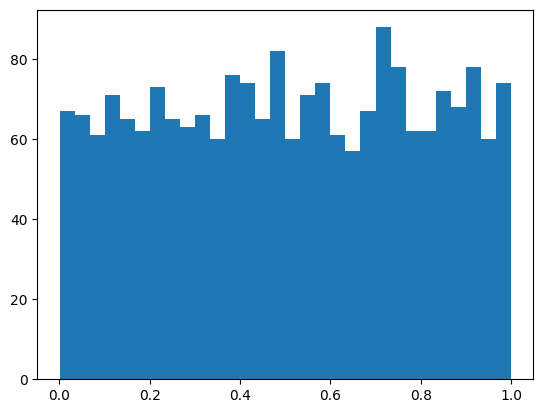

In [10]:
plt.hist(x[0,0,:], bins=30)

In [11]:
q_t = model.q_sample(x, 2000)

In [12]:
q_t[0,1999,0,:]

tensor([-0.2722, -0.6236, -0.0632,  ..., -0.6400,  0.0048, -1.2276])

(array([  2.,   4.,   7.,   7.,  17.,   8.,  26.,  37.,  69.,  88., 131.,
        158., 192., 180., 182., 188., 167., 166., 130.,  95.,  68.,  47.,
         39.,  13.,  13.,   7.,   2.,   2.,   2.,   1.]),
 array([-3.17706847, -2.9251771 , -2.67328572, -2.42139459, -2.16950321,
        -1.91761184, -1.66572058, -1.41382921, -1.16193795, -0.91004658,
        -0.65815526, -0.40626398, -0.15437265,  0.09751868,  0.34941   ,
         0.60130131,  0.85319263,  1.10508394,  1.35697532,  1.60886657,
         1.86075795,  2.1126492 ,  2.36454058,  2.61643195,  2.86832309,
         3.12021446,  3.37210584,  3.62399721,  3.87588835,  4.12777996,
         4.3796711 ]),
 <BarContainer object of 30 artists>)

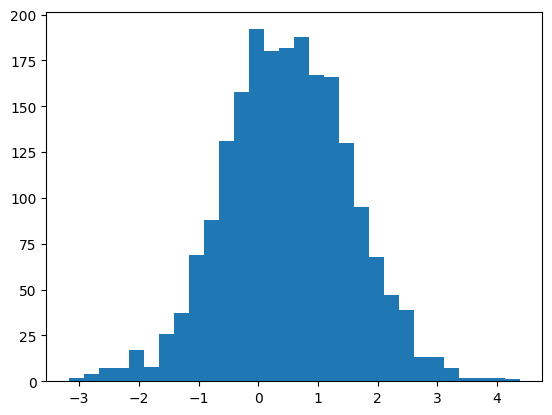

In [13]:
plt.hist(x[0,0,:]-q_t[0,1999,0,:], bins=30)

(array([  6.,  16.,  28.,  53.,  80.,  91.,  83.,  86.,  96.,  93.,  96.,
         95.,  92.,  77., 106., 100., 100.,  75., 107.,  99.,  84.,  99.,
         93.,  76.,  52.,  35.,  21.,   5.,   3.,   1.]),
 array([-0.09443925, -0.06324223, -0.0320452 , -0.00084818,  0.03034884,
         0.06154586,  0.09274288,  0.1239399 ,  0.15513691,  0.18633394,
         0.21753097,  0.24872798,  0.27992499,  0.31112203,  0.34231904,
         0.37351605,  0.40471309,  0.43591011,  0.46710712,  0.49830416,
         0.52950114,  0.56069821,  0.59189522,  0.62309223,  0.65428925,
         0.68548626,  0.71668327,  0.74788034,  0.77907735,  0.81027436,
         0.84147137]),
 <BarContainer object of 30 artists>)

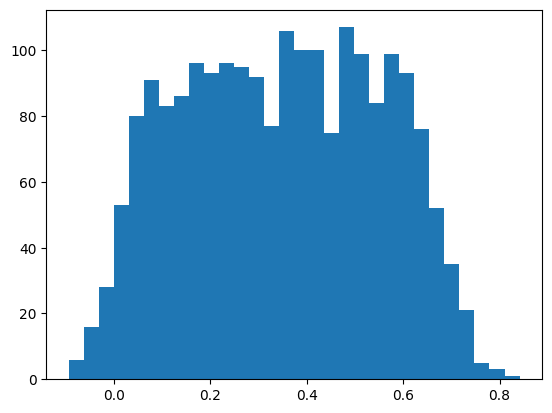

In [14]:
plt.hist(q_t[0,0,0,:].detach().numpy(), bins=30)

(array([  2.,   0.,   0.,   3.,   9.,   4.,  23.,  29.,  40.,  75.,  96.,
        122., 143., 185., 199., 224., 178., 176., 156., 125.,  91.,  58.,
         38.,  24.,  17.,  17.,   8.,   2.,   3.,   1.]),
 array([-3.81686592, -3.56857824, -3.32029033, -3.07200265, -2.82371473,
        -2.57542706, -2.32713914, -2.07885146, -1.83056366, -1.58227587,
        -1.33398807, -1.08570027, -0.83741248, -0.58912468, -0.34083688,
        -0.09254909,  0.1557387 ,  0.40402648,  0.65231431,  0.90060204,
         1.1488899 ,  1.3971777 ,  1.64546549,  1.89375317,  2.14204097,
         2.39032888,  2.63861656,  2.88690448,  3.13519216,  3.38348007,
         3.63176775]),
 <BarContainer object of 30 artists>)

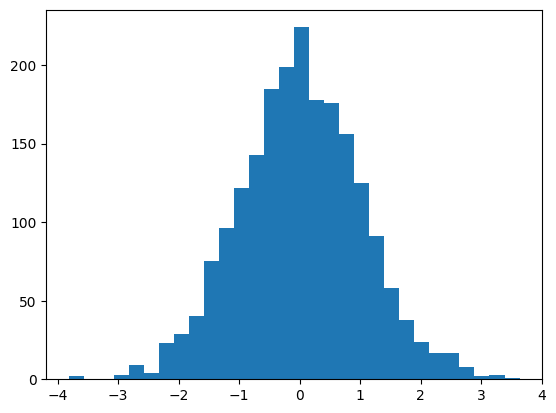

In [15]:
plt.hist(q_t[0,1999,0,:].detach().numpy(), bins=30)